<a href="https://colab.research.google.com/github/Mottarav/walmart_case/blob/main/walmartcase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

### Importação dos dados

In [ ]:
url = 'https://raw.githubusercontent.com/ipauchner/Projects/main/Walmart/Walmart.csv'
df = pd.read_csv(url)

### Checagem dataset

In [ ]:
# Tamanho dataset
df.shape

(6435, 8)

In [ ]:
# info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [ ]:
# colunas do dataset
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [ ]:
# describe dataset
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [ ]:
# checking nulls / missing values
df.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

### Convertendo variavel data

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


### Convertendo coluna Fahrenheit para Celsius

In [ ]:
df['Temp_C'] = ((df['Temperature']-32)/1.8).round(2)
df.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Temp_C
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,5.73
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,3.62
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,4.41
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,8.13
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,8.06
5,1,2010-12-03,1439541.59,0,57.79,2.667,211.380643,8.106,14.33
6,1,2010-03-19,1472515.79,0,54.58,2.720,211.215635,8.106,12.54
7,1,2010-03-26,1404429.92,0,51.45,2.732,211.018042,8.106,10.81
8,1,2010-02-04,1594968.28,0,62.27,2.719,210.820450,7.808,16.82
9,1,2010-09-04,1545418.53,0,65.86,2.770,210.622857,7.808,18.81


### Média vendas semana por loja


In [ ]:
# média vendas por loja por semana
df.groupby('Store').agg({'Weekly_Sales':['mean']}).round()

,Weekly_Sales
,mean
Store,
1,1555264.0
2,1925751.0
3,402704.0
4,2094713.0
5,318012.0
6,1564728.0
7,570617.0
8,908750.0


### Vendas acumuldas periodo

In [ ]:
# vendas totais todas as lojas todos os periodos
vendas_totais = df['Weekly_Sales'].sum()
vendas_totais

6737218987.11

In [ ]:
# Criando dataframe para calcular total de vendas periodo por loja
df_sum = df.groupby('Store')['Weekly_Sales'].sum().round().sort_values(ascending=False)
df_sum

Store
20    301397792.0
4     299543953.0
14    288999911.0
13    286517704.0
2     275382441.0
10    271617714.0
27    253855917.0
6     223756131.0
1     222402809.0
39    207445542.0
19    206634862.0
31    199613906.0
23    198750618.0
24    194016021.0
11    193962787.0
28    189263681.0
41    181341935.0
32    166819246.0
18    155114734.0
22    147075649.0
12    144287230.0
26    143416394.0
34    138249763.0
40    137870310.0
35    131520672.0
8     129951181.0
17    127782139.0
45    112395341.0
21    108117879.0
25    101061179.0
43     90565435.0
15     89133684.0
7      81598275.0
42     79565752.0
9      77789219.0
29     77141554.0
16     74252425.0
37     74202740.0
30     62716885.0
3      57586735.0
38     55159626.0
36     53412215.0
5      45475689.0
44     43293088.0
33     37160222.0
Name: Weekly_Sales, dtype: float64

In [ ]:
# soma, maximo, minimo e média
ws_info = df.groupby(['Store']).agg({'Weekly_Sales':['sum','max','min','mean']})
ws_info.round().sort_values(by=[('Weekly_Sales', 'max')],ascending=False)

Weekly_Sales                                 
               sum        max        min       mean
Store                                              
14     288999911.0  3818686.0  1479515.0  2020978.0
20     301397792.0  3766687.0  1761017.0  2107677.0
10     271617714.0  3749058.0  1627707.0  1899425.0
4      299543953.0  3676389.0  1762539.0  2094713.0
13     286517704.0  3595903.0  1633663.0  2003620.0
2      275382441.0  3436008.0  1650394.0  1925751.0
27     253855917.0  3078162.0  1263535.0  1775216.0
23     198750618.0  2734277.0  1016756.0  1389864.0
6      223756131.0  2727575.0  1261253.0  1564728.0
19     206634862.0  2678206.0  1181205.0  1444999.0
39     207445542.0  2554483.0  1158698.0  1450668.0
1      222402809.0  2387950.0  1316899.0  1555264.0
24     194016021.0  2386016.0  1057290.0  1356755.0
11     193962787.0  2306265.0  1100419.0  1356383.0
41     181341935.0  2263723.0   991942.0  1268125.0
31     199613906.0  2068943.0  1198072.0  1395901.0
18     155114734.0  2027507.0   540923.0  1084718.0
28     189263681.0  2026026.0  1079669.0  1323522.0
22     147075649.0  1962445.0   774262.0  1028501.0
32     166819246.0  1959527.0   955464.0  1166568.0
35     131520672.0  1781867.0   576332.0   919725.0
12     144287230.0  1768250.0   802106.0  1009002.0
45     112395341.0  1682862.0   617208.0   785981.0
40     137870310.0  1648829.0   764015.0   964128.0
34     138249763.0  1620748.0   836718.0   966782.0
21     108117879.0  1587258.0   596218.0   756069.0
26     143416394.0  1573982.0   809833.0  1002912.0
8      129951181.0  1511641.0   772539.0   908750.0
15      89133684.0  1368318.0   454183.0   623312.0
17     127782139.0  1309227.0   635863.0   893581.0
25     101061179.0  1295391.0   558795.0   706722.0
29      77141554.0  1130927.0   395987.0   539451.0
7       81598275.0  1059715.0   372674.0   570617.0
16      74252425.0  1004731.0   368600.0   519248.0
9       77789219.0   905325.0   452905.0   543981.0
43      90565435.0   725043.0   505406.0   633325.0
42      79565752.0   674919.0   428954.0   556404.0
3       57586735.0   605990.0   339597.0   402704.0
37      74202740.0   605791.0   451328.0   518900.0
30      62716885.0   519355.0   369722.0   438580.0
5       45475689.0   507900.0   260637.0   318012.0
38      55159626.0   499268.0   303909.0   385732.0
36      53412215.0   489372.0   270678.0   373512.0
44      43293088.0   376234.0   241937.0   302749.0
33      37160222.0   331174.0   209986.0   259862.0

### Analise por semana (Agrupamento por data)

In [ ]:
# Verificando média das vendas em cada semana (todas as lojas)
x = df.groupby(['Date']).mean().round().sort_values(by='Weekly_Sales', ascending=False)
x

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Temp_C
Date,,,,,,,,
2010-12-24,23.0,1798476.0,0.0,41.0,3.0,168.0,8.0,5.0
2011-12-23,23.0,1711072.0,0.0,40.0,3.0,174.0,8.0,4.0
2011-11-25,23.0,1479858.0,1.0,50.0,3.0,173.0,8.0,10.0
2010-11-26,23.0,1462689.0,1.0,48.0,3.0,169.0,8.0,9.0
2010-12-17,23.0,1373796.0,0.0,40.0,3.0,168.0,8.0,5.0
...,...,...,...,...,...,...,...,...
2011-01-14,23.0,903860.0,0.0,31.0,3.0,169.0,8.0,-1.0
2011-01-21,23.0,903437.0,0.0,38.0,3.0,169.0,8.0,3.0
2010-12-31,23.0,898500.0,1.0,37.0,3.0,169.0,8.0,3.0


### Min/Max Lojas e Datas

In [ ]:
df.nlargest(20,'Weekly_Sales')

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Temp_C
1905,14,2010-12-24,3818686.45,0,30.59,3.141,182.544590,8.724,-0.78
2763,20,2010-12-24,3766687.43,0,25.17,3.141,204.637673,7.484,-3.79
1333,10,2010-12-24,3749057.69,0,57.06,3.236,126.983581,9.003,13.92
527,4,2011-12-23,3676388.98,0,35.92,3.103,129.984548,5.143,2.18
1762,13,2010-12-24,3595903.20,0,34.90,2.846,126.983581,7.795,1.61
1814,13,2011-12-23,3556766.03,0,24.76,3.186,129.984548,6.392,-4.02
2815,20,2011-12-23,3555371.03,0,40.19,3.389,212.236040,7.082,4.55
475,4,2010-12-24,3526713.39,0,43.21,2.887,126.983581,7.127,6.23
1385,10,2011-12-23,3487986.89,0,48.36,3.541,129.984548,7.874,9.09
189,2,2010-12-24,3436007.68,0,49.97,2.886,211.064660,8.163,9.98


In [ ]:
df.groupby(['Date','Store']).agg({'Weekly_Sales':['min']}).sort_values(by=['Store','Date'],ascending=True).head(50)

,,Weekly_Sales
,,min
Date,Store,
2010-01-10,1,1453329.50
2010-02-04,1,1594968.28
2010-02-07,1,1492418.14
2010-02-19,1,1611968.17
2010-02-26,1,1409727.59
2010-03-09,1,1540163.53
2010-03-12,1,1548033.78
2010-03-19,1,1472515.79


In [ ]:
# Dias com maiores vendas e loja que efetuou as vendas
df.groupby(['Date','Store']).agg({'Weekly_Sales':['min']}).sort_values(by=[('Weekly_Sales', 'min')],ascending=False).head(50)


Weekly_Sales
                          min
Date       Store             
2010-12-24 14      3818686.45
           20      3766687.43
           10      3749057.69
2011-12-23 4       3676388.98
2010-12-24 13      3595903.20
2011-12-23 13      3556766.03
           20      3555371.03
2010-12-24 4       3526713.39
2011-12-23 10      3487986.89
2010-12-24 2       3436007.68
2011-12-23 14      3369068.99
           2       3224369.80
2010-12-24 27      3078162.08
2011-11-25 4       3004702.33
           10      2950198.64
2010-11-26 10      2939946.38
           14      2921709.71
2011-11-25 20      2906233.25
           13      2864170.61
2010-12-17 20      2819193.17
           10      2811646.85
2010-11-26 20      2811634.04
           4       2789469.45
2010-12-17 13      2771646.81
2011-12-16 4       2771397.17
2010-11-26 13      2766400.05
2010-12-17 14      2762861.41
2011-12-16 20      2762816.65
           13      2760346.71
2010-10-12 20      2752122.08
2010-12-17 4       2740057.14
2011-12-23 27      2739019.75
2010-12-24 23      2734277.10
           6       2727575.18
2011-11-25 14      2685351.81
2010-12-24 19      2678206.42
2010-11-26 2       2658725.29
2011-12-23 6       2644633.02
2010-11-26 27      2627910.75
2010-05-02 14      2623469.95
2011-11-25 2       2614202.30
2010-12-17 2       2609166.75
2010-10-12 14      2600519.26
2011-12-16 14      2594363.09
2011-12-23 23      2587953.32
2012-06-04 20      2565259.92
2011-12-16 10      2555031.18
2011-12-23 39      2554482.84
2011-09-12 20      2546123.78
           4       2508955.24

In [ ]:
# Venda minima e maxima em cada dia do dataset
df.groupby(['Date'])['Weekly_Sales'].agg([('Min' , 'min'), ('Max', 'max')]).add_prefix('Sell_')

,Sell_Min,Sell_Max
Date,,
2010-01-10,224294.39,1933719.21
2010-02-04,274634.52,2495630.51
2010-02-07,267495.76,2334788.42
2010-02-19,267956.30,2204556.70
2010-02-26,270281.63,2095591.63
...,...,...
2012-10-08,297753.49,2193367.69
2012-10-19,254412.34,2097266.85
2012-10-26,253731.13,2149594.46


In [ ]:
# gerando série de valores MAXIMOS de venda
x1 = df.groupby('Store')['Weekly_Sales'].max()

# Dataframe apenas com valores maximos de venda
maxvendas = df['Weekly_Sales'].isin(x1)
df[maxvendas].sort_values(by='Weekly_Sales',ascending=False).head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Temp_C
1905,14,2010-12-24,3818686.45,0,30.59,3.141,182.544590,8.724,-0.78
2763,20,2010-12-24,3766687.43,0,25.17,3.141,204.637673,7.484,-3.79
1333,10,2010-12-24,3749057.69,0,57.06,3.236,126.983581,9.003,13.92
527,4,2011-12-23,3676388.98,0,35.92,3.103,129.984548,5.143,2.18
1762,13,2010-12-24,3595903.20,0,34.90,2.846,126.983581,7.795,1.61


In [ ]:
# gerando série de valores MINIMOS de venda
y1 = df.groupby('Store')['Weekly_Sales'].min()

# Dataframe apenas com valores minimos de venda
minvendas = df['Weekly_Sales'].isin(y1)
df[minvendas].sort_values(by='Weekly_Sales', ascending=True).head()


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Temp_C
4619,33,2010-03-12,209986.25,0,52.82,3.041,126.731333,9.265,11.57
6196,44,2010-12-31,241937.11,1,26.79,2.868,127.087677,7.610,-2.89
621,5,2011-01-14,260636.71,0,37.74,2.983,212.008514,6.634,3.19
5143,36,2012-09-28,270677.98,0,79.49,3.660,221.655600,6.623,26.38
5338,38,2010-12-31,303908.81,1,45.64,3.148,127.087677,14.313,7.58


In [ ]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Temp_C'],
      dtype='object')

In [ ]:
# Variação em % da menor venda para a maior venda por loja
maxvendas2 = df[maxvendas].drop(columns=['Date']).reset_index(drop=True)
minvendas2 = df[minvendas].drop(columns=['Date']).reset_index(drop=True)

variacao = ((maxvendas2['Weekly_Sales']-minvendas2['Weekly_Sales'])/minvendas2['Weekly_Sales'])*100
variacao.index = np.arange(1,len(variacao)+1)
variacao.round(2)

1      81.33
2     108.19
3      78.44
4     108.58
5      94.87
6     116.26
7     184.35
8      95.67
9      99.89
10    130.33
11    109.58
12    120.45
13    120.11
14    158.10
15    201.27
16    172.58
17    105.90
18    274.82
19    126.74
20    113.89
21    166.22
22    153.46
23    168.92
24    125.67
25    131.82
26     94.36
27    143.62
28     87.65
29    185.60
30     40.47
31     72.69
32    105.09
33     57.71
34     93.70
35    209.17
36     80.79
37     34.22
38     64.28
39    120.46
40    115.81
41    128.21
42     57.34
43     43.46
44     55.51
45    172.66
Name: Weekly_Sales, dtype: float64

### Analise 5 lojas maiores vendas

In [ ]:
# vendas totais (calculo feito mais pra cima)
vendas_totais

6737218987.11

In [ ]:
# Analise das 5 lojas com maiores vendas [20,4,14,13,2]
vendas_top5 = df.loc[df['Store'].isin([20,4,14,13,2]),'Weekly_Sales'].sum().round()
vendas_top5

1451841802.0

In [ ]:
# percentual representado das 5 lojas maiores vendas no total
((vendas_top5/vendas_totais)*100).round(2)

21.55

### Loja 4 e Loja 20 no detalhe

In [ ]:
#É possivel ver melhor oportunidade de investimento na loja 4, considerando os dados abaixo:



In [ ]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Temp_C'],
      dtype='object')

In [ ]:
# Detalhes LOJA 4
CPI4 = df.loc[df['Store'].isin([4]),'CPI'].mean().round()
HOLYDAY4 = df.loc[df['Store'].isin([4]),'Holiday_Flag'].sum().round()
TEMP4 = df.loc[df['Store'].isin([4]),'Temp_C'].mean().round()
GAS4 = df.loc[df['Store'].isin([4]),'Fuel_Price'].mean().round(2)
SALESTTL4 = df.loc[df['Store'].isin([4]),'Weekly_Sales'].sum().round()
SALESMEAN4 = df.loc[df['Store'].isin([4]),'Weekly_Sales'].mean().round()
print(f'Loja 4\nDetalhes:\nTotal Venda no Período: {SALESTTL4}\nMédia Venda no Período: {SALESMEAN4}\nTotal Semanas com Feriado: {HOLYDAY4}\nMédia CPI: {CPI4}\nMédia Preço Combustivel: {GAS4}\nMédia Temperatura (Em C°): {TEMP4}')

Loja 4
Detalhes:
Total Venda no Período: 299543953.0
Média Venda no Período: 2094713.0
Total Semanas com Feriado: 10
Média CPI: 129.0
Média Preço Combustivel: 3.22
Média Temperatura (Em C°): 17.0


In [ ]:
# Detalhes LOJA 20
CPI20 = df.loc[df['Store'].isin([20]),'CPI'].mean().round()
HOLYDAY20 = df.loc[df['Store'].isin([20]),'Holiday_Flag'].sum().round()
TEMP20 = df.loc[df['Store'].isin([20]),'Temp_C'].mean().round()
GAS20 = df.loc[df['Store'].isin([20]),'Fuel_Price'].mean().round(2)
SALESTTL20 = df.loc[df['Store'].isin([20]),'Weekly_Sales'].sum().round()
SALESMEAN20 = df.loc[df['Store'].isin([20]),'Weekly_Sales'].mean().round()
print(f'Loja 20\nDetalhes:\nTotal Venda no Período: {SALESTTL20}\nMédia Venda no Período: {SALESMEAN20}\nTotal Semanas com Feriado: {HOLYDAY20}\nMédia CPI: {CPI20}\nMédia Preço Combustivel: {GAS20}\nMédia Temperatura (Em C°): {TEMP20}')

Loja 20
Detalhes:
Total Venda no Período: 301397792.0
Média Venda no Período: 2107677.0
Total Semanas com Feriado: 10
Média CPI: 209.0
Média Preço Combustivel: 3.42
Média Temperatura (Em C°): 13.0


### Gráfico histograma

In [ ]:
# Histograma de vendas totais por loja (com linhas de valores)
plt.figure(figsize=(16,10))
ws_info[('Weekly_Sales','sum')].plot(kind='bar',color='teal')
plt.xticks(rotation=0)
plt.title('Total SOMA de Vendas')
plt.ylabel('Vendas (em centenas de milhões)')
plt.axhline(y=200000000,color='blue')
plt.axhline(y=100000000,color='orange')
plt.axhline(y=300000000,color='red')
plt.show()

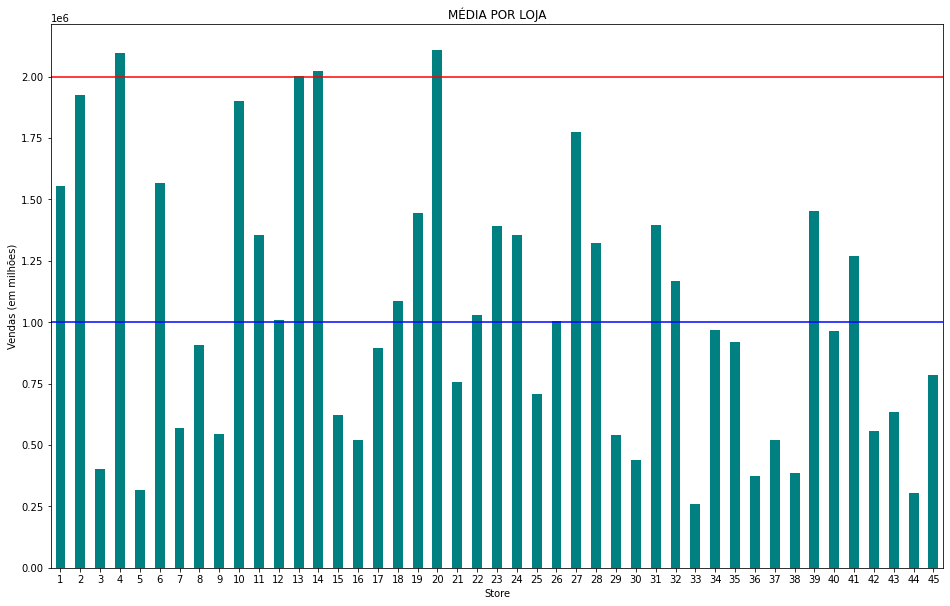

In [ ]:
# Histograma de média de vendas por loja (com linhas de valores)
plt.figure(figsize=(16,10))
ws_info[('Weekly_Sales','mean')].plot(kind='bar',color='teal')
plt.xticks(rotation=0)
plt.title('MÉDIA POR LOJA')
plt.ylabel('Vendas (em milhões)')
plt.axhline(y=2000000,color='red')
plt.axhline(y=1000000,color='blue')
plt.show()

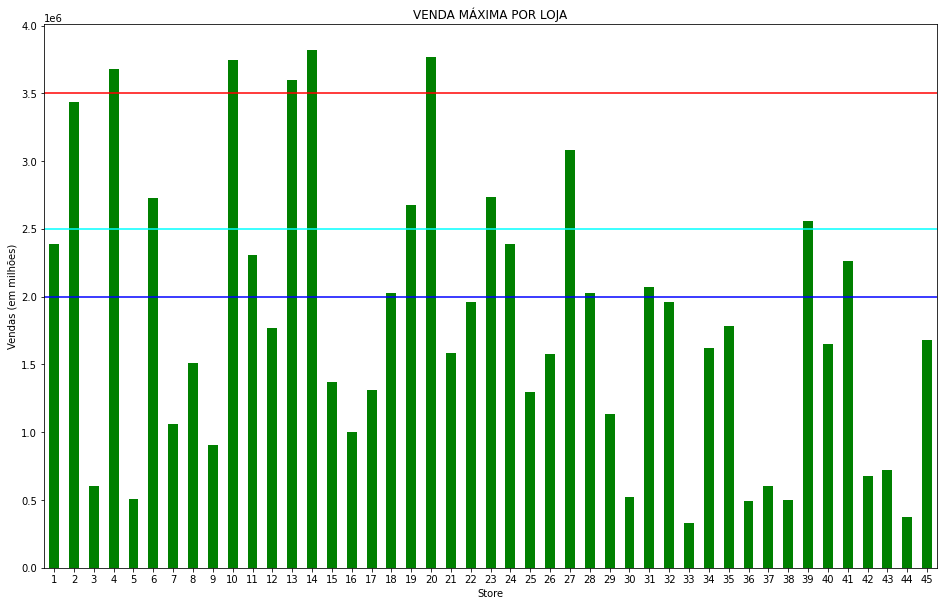

In [ ]:
# Histograma de média de vendas por loja (com linhas de valores)
plt.figure(figsize=(16,10))
ws_info[('Weekly_Sales','max')].plot(kind='bar',color='green')
plt.xticks(rotation=0)
plt.title('VENDA MÁXIMA POR LOJA')
plt.ylabel('Vendas (em milhões)')
plt.axhline(y=3500000,color='red')
plt.axhline(y=2500000,color='cyan')
plt.axhline(y=2000000,color='blue')
plt.show()

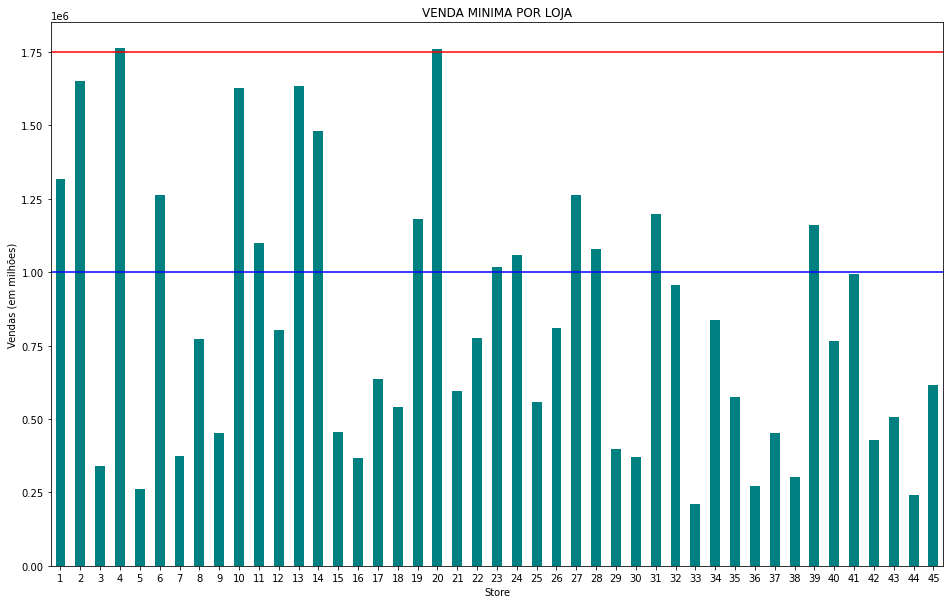

In [ ]:
# Histograma de média de vendas por loja (com linhas de valores)
plt.figure(figsize=(16,10))
ws_info[('Weekly_Sales','min')].plot(kind='bar',color='teal')
plt.xticks(rotation=0)
plt.title('VENDA MINIMA POR LOJA')
plt.ylabel('Vendas (em milhões)')
plt.axhline(y=1750000,color='red')
plt.axhline(y=1000000,color='blue')
plt.show()

### Correlações

In [ ]:
variaveis_hm = ['Store', 'Weekly_Sales', 'Holiday_Flag',
       'Fuel_Price', 'CPI', 'Unemployment', 'Temp_C']
df_hm = df[variaveis_hm].astype('float64')
df_hm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   float64
 1   Weekly_Sales  6435 non-null   float64
 2   Holiday_Flag  6435 non-null   float64
 3   Fuel_Price    6435 non-null   float64
 4   CPI           6435 non-null   float64
 5   Unemployment  6435 non-null   float64
 6   Temp_C        6435 non-null   float64
dtypes: float64(7)
memory usage: 352.0 KB


In [ ]:
df_hm_graph = df_hm.corr().round(2)
df_hm_graph

,Store,Weekly_Sales,Holiday_Flag,Fuel_Price,CPI,Unemployment,Temp_C
Store,1.00,-0.34,-0.00,0.06,-0.21,0.22,-0.02
Weekly_Sales,-0.34,1.00,0.04,0.01,-0.07,-0.11,-0.06
Holiday_Flag,-0.00,0.04,1.00,-0.08,-0.00,0.01,-0.16
Fuel_Price,0.06,0.01,-0.08,1.00,-0.17,-0.03,0.14
CPI,-0.21,-0.07,-0.00,-0.17,1.00,-0.30,0.18
Unemployment,0.22,-0.11,0.01,-0.03,-0.30,1.00,0.10
Temp_C,-0.02,-0.06,-0.16,0.14,0.18,0.10,1.00


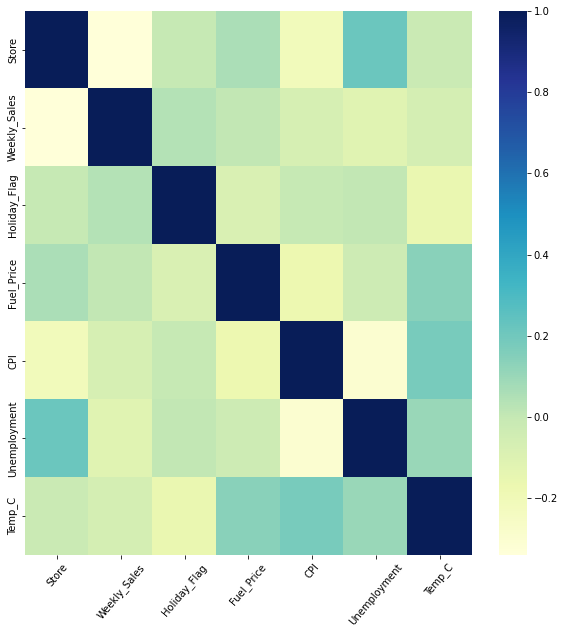

In [ ]:
fig = plt.figure(figsize=[10,10])
sns.heatmap(df_hm_graph, cmap='YlGnBu')
plt.xticks(rotation=50)
plt.show(block=False)
plt.close('all')